# Analytics with audio files in python

HK


In [75]:
import librosa
import librosa.display
from pydub import AudioSegment
from pydub.playback import play

import pandas as pd
import os

import matplotlib.pyplot as plt
import random

import numpy as np

In [24]:
print(os.listdir())
print(os.getcwd())

['.ipynb_checkpoints', 'Audio_python.ipynb', 'gawandian.mp3']
/Users/mk113327/OneDrive - GSK/Projects/QMentoring


## Things we might want to consider for analysis

- Time domain features like RMSE of waveforms
- Frequency domain features like amplitude of individual frequencies
- Perceptual features like MFCC
- windowing features like hamming distance of features

## Loading the song with two different libraries

pydub and librosa: both load the audiobyte as a separate data type

In [28]:
song = AudioSegment.from_file('gawandian.mp3', 'mp3')
song1, sr = librosa.load('gawandian.mp3')

In [6]:
song

## Subsetting the song

All values are in milliseconds

In [7]:
song[:10*1000]

In [8]:
song[10*1000:]

## How librosa reads the song in

librosa package reads the song in as an array. Such arrays can be represented as wave forms and hence all analytics applied to wave forms can be applied here.

In [18]:
print(len(song1))
print(len(song1[0]))

2
3454272


In [20]:
song1

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050)

In [21]:
type(song1)


tuple

Plotting the song as a waveform

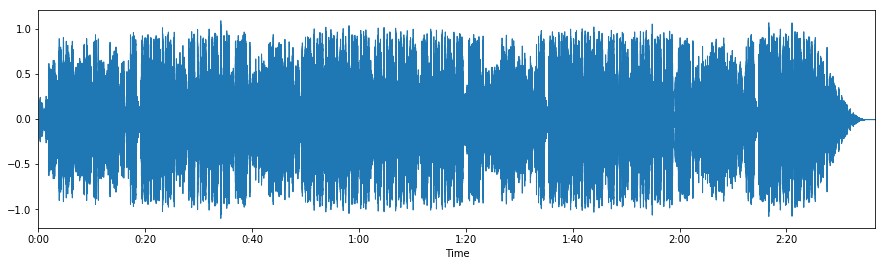

In [32]:
plt.figure(figsize=(15, 4))
librosa.display.waveplot(song1)

## Extracting features using librosa

Looking at librosa in detail would be beneficial
https://librosa.github.io/librosa/tutorial.html

In [97]:
# we extract mfcc feature from data
mfccs = np.mean(librosa.feature.mfcc(y=song1, sr=sr, n_mfcc=40).T,axis=0) 

In [98]:
mfccs

array([-9.20621592e+01,  4.71284510e+01,  3.76617029e+00,  1.84877794e+01,
       -1.55119300e+00,  1.75064103e+01, -4.58654498e+00, -6.80764031e-01,
        9.65847711e-01,  7.53863347e+00, -1.81183312e+00,  5.89387522e+00,
        4.00022984e-01,  2.65459158e+00, -3.32540435e+00,  7.15449681e+00,
       -8.94760436e+00,  5.18183938e+00, -2.40895763e+00,  1.70865349e+00,
       -1.39471663e-01,  4.72191714e+00, -7.01528126e-02,  6.99470752e+00,
        2.80452486e+00,  4.83088971e+00,  6.56004597e-01,  2.40894632e+00,
       -1.68437933e+00,  5.94758908e-02, -2.14638612e+00, -2.00285743e+00,
       -3.35404383e+00, -4.04487694e-01, -3.86464855e+00,  1.25324475e+00,
       -3.50123036e+00,  8.26932679e-01, -2.44993287e+00,  6.78551038e-01])

In [99]:
librosa.*

SyntaxError: invalid syntax (<ipython-input-99-d46a4d5a40c4>, line 1)

### Beat tracker


In [101]:
#Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=song1, sr=sr)


/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [107]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


Convert the frame indices of beat events into timestamps

In [111]:
# Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([  0.23219955,   0.78947846,   1.32353741,   1.81115646,
         2.29877551,   2.85605442,   3.39011338,   3.9938322 ,
         4.59755102,   5.15482993,   5.71210884,   6.2461678 ,
         6.80344671,   7.36072562,   7.89478458,   8.42884354,
         8.96290249,   9.54340136,  10.10068027,  10.63473923,
        11.16879819,  11.70285714,  12.26013605,  12.79419501,
        13.35147392,  13.88553288,  14.41959184,  14.90721088,
        15.39482993,  15.92888889,  16.4861678 ,  17.02022676,
        17.55428571,  18.11156463,  18.71528345,  19.31900227,
        19.87628118,  20.43356009,  20.96761905,  21.52489796,
        22.05895692,  22.61623583,  23.15029478,  23.7075737 ,
        24.24163265,  24.79891156,  25.33297052,  25.89024943,
        26.42430839,  26.95836735,  27.51564626,  28.07292517,
        28.60698413,  29.16426304,  29.698322  ,  30.25560091,
        30.78965986,  31.34693878,  31.88099773,  32.43827664,
        32.9723356 ,  33.52961451,  34.06367347,  34.62

Separate harmonics and percussives into two waveforms

In [112]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(song1)

Lets try calculating beat frames with separate waveforms as calculated above

In [124]:
tempo, beat_frames = librosa.beat.beat_track(y_percussive, sr)

/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [125]:
tempo

112.34714673913044

Calculating mfcc

In [126]:
mfcc = librosa.feature.mfcc(y=song1, sr=sr, n_mfcc=40)

In [127]:
mfcc

array([[-476.44176361, -476.44176361, -476.44176361, ..., -476.44176361,
        -476.44176361, -476.44176361],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

Calculating delta

In [128]:
mfcc_delta = librosa.feature.delta(mfcc)

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [129]:
mfcc_delta

array([[ 1.78657677e+01,  1.78657677e+01,  1.78657677e+01, ...,
         1.59193415e-14,  1.59193415e-14,  1.59193415e-14],
       [ 1.03700541e+01,  1.03700541e+01,  1.03700541e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.43460413e-01, -6.43460413e-01, -6.43460413e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.29121792e-02,  9.29121792e-02,  9.29121792e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.64468526e-01, -2.64468526e-01, -2.64468526e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.14284497e-01, -1.14284497e-01, -1.14284497e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])